In [1]:
!export PYTHONPATH="/Users/fiorino/anaconda3/envs/ultimate/lib/python3.7/site-packages/"

from ultianalyticspull import pullers
from ultianalyticspull import huddlers

# Investigate the Pro Leagues

## PUL

In [2]:
pul_pull = pullers.LeaguePuller(league = 'pul', years=[2019])

In [3]:
pul_pull.pull()

2019 Atlanta Soul
2019 Austin Torch
2019 Columbus Pride
2019 Indy Red
2019 Medellin Revolution
2019 Nashville Nightshade
2019 New York Gridlock
2019 Raleigh Radiance


## AUDL

In [7]:
audl_pull = pullers.LeaguePuller(league = 'audl', years=range(2014,2020))

In [10]:
audl_pull.pull()

# Investigate your own team!

In [18]:
team_number='6305900843237376'
team_name='MSP'
year=2019
output_dir='/Users/fiorino/Downloads/'
custom_pull = pullers.UltiAnalyticsPuller(team_number,team_name,year,output_dir)
custom_pull.pull()

In [19]:
custom_pull_df = custom_pull.get_enhanced_dataframe()

In [20]:
custom_pull_df[(custom_pull_df.Action=='Goal')].Passer.value_counts()[:5]

Tristan    23
Roske      19
Kens       10
Ruda        9
Brad        8
Name: Passer, dtype: int64

In [22]:
custom_pull_df[(custom_pull_df.Action=='Goal')].Receiver.value_counts()[:5]

Brad     16
Dani     11
Mo       10
Roske     9
EA        9
Name: Receiver, dtype: int64

In [24]:
custom_pull_df[(custom_pull_df.Action=='D')].Defender.value_counts()[:5]

Tristan    16
Tanner     10
Joe         8
Bo          7
Mo          6
Name: Defender, dtype: int64

In [25]:
custom_pull_df[custom_pull_df.Lineup.str.contains('EA')].groupby(['GameID','PointID']).ngroups

69

In [26]:
custom_pull_df[(custom_pull_df.Passer=='Tristan')&(custom_pull_df.Action=='Goal')].Receiver.value_counts()[:5]

Brad     6
Roske    3
Vandy    3
Bekah    3
Max      1
Name: Receiver, dtype: int64

# Compile aggregate stats with the Huddler

In [28]:
scoob = huddlers.Scoober(custom_pull.enhanced_export_file)

scoob.dataframe[scoob.slice(actions=['Goal'])].head(1)[scoob.dataframe.columns[:12]]

,Date/Time,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,Receiver,Defender,Hang Time (secs)
6,2019-06-22 08:52,Rust,150,D,1,0,Offense,Goal,Kens,Kelsey M,NaN,NaN


In [30]:
hudd = huddlers.Huddler(scoob)

In [31]:
hudd.huddle()

In [32]:
df = scoob.dataframe
df[(df.Passer=='EA')].Action.value_counts()

Catch           53
Throwaway        7
HockeyAssist     7
Goal             7
Drop             3
Name: Action, dtype: int64

In [34]:
hudd.player_stats_by_year[['Name','Throws','Completions','Throwaways','Assists',
                           'Completion Percentage','Throwaway Percentage','Drop Percentage']].sort_values('Throwaway Percentage')

hudd.player_stats_by_year[['Name','Catches','Goals','Assists','Hockey Assists','Drops']].iloc[:5]

,Name,Catches,Goals,Assists,Hockey Assists,Drops
0,Claire,36,1.0,1.0,3.0,1.0
1,Cole,55,9.0,7.0,9.0,2.0
2,Kelsey M,35,6.0,3.0,3.0,4.0
3,KelseyK3,35,1.0,2.0,7.0,1.0
4,Kens,55,1.0,10.0,3.0,1.0


In [13]:
import glob

for teamfile in glob.glob('../ultianalyticspull/data/audl/processed/2019/*.csv'):
    team = huddlers.Scoober(teamfile).dataframe
    print(teamfile,len(team['Lateral Distance'].value_counts()))


../ultianalyticspull/data/audl/processed/2019/2019_OttawaOutlaws.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_MinnesotaWindChill.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_DallasRoughnecks.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_SanDiegoGrowlers.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_AtlantaHustle.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_DCBreeze.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_PittsburghThunderbirds.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_NewYorkEmpire.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_AustinSol.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_MontrealRoyal.csv 323
../ultianalyticspull/data/audl/processed/2019/2019_SanJoseSpiders.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_TampaBayCannons.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_DetroitMechanix.csv 0
../ultianalyticspull/data/audl/processed/2019/2019_MadisonR

In [71]:
# tdf = team.dataframe[['Action','Event Type','Begin Area','Begin X', 'Begin Y', 'End Area', 'End X', 'End Y',
#    'Distance Unit of Measure', 'Absolute Distance', 'Lateral Distance',
#    'Toward Our Goal Distance']]
# tdf[tdf.Action.str.contains('Pull')]#['Begin Area'].value_counts()

In [2]:
audl_field_width = 53.33 #yards
audl_field_length= 80 #yards
audl_endzone_length= 20 #yards

team = huddlers.Fury('../../ultianalyticspull/data/audl/processed/2019/2019_LosAngelesAviators.csv',
                    'Los Angeles Aviators')

# team = huddlers.Fury('../../ultianalyticspull/data/audl/processed/2019/2019_MontrealRoyal.csv',
#                     'Montreal Royal')
########
########
area_extra_added_length_dict = {'Field' : audl_endzone_length,
                'Endzone A' : 0,
                'Endzone B' : audl_endzone_length+audl_field_length}
area_length_dict = {'Field' : audl_field_length,
                'Endzone A' : audl_endzone_length,
                'Endzone B' : audl_endzone_length}
import numpy as np
def get_absolute_x(x,area):
    if x!=x:
        return np.nan
    return x*area_length_dict[area] + area_extra_added_length_dict[area]

def get_absolute_y(y):
    if y!=y:
        return np.nan
    return y*audl_field_width
    
def get_absolute_postion(row):
    row['Begin X Abs'] = get_absolute_x(row['Begin X'],row['Begin Area'])
    row['End X Abs'] = get_absolute_x(row['End X'],row['End Area'])
    row['Begin Y Abs'] = get_absolute_y(row['Begin Y'])
    row['End Y Abs'] = get_absolute_y(row['End Y'])
    if row['Toward Our Goal Distance'] == row['Toward Our Goal Distance']:
        if row['Toward Our Goal Distance']==0:
            sign= 0
        else:
            sign = (2*int(row['Begin Y Abs'] > row['End Y Abs'])-1)*(2*int(row['Begin X Abs'] > row['End X Abs'])-1)*(row['Toward Our Goal Distance']/abs(row['Toward Our Goal Distance']))
    else:
        sign = np.nan
    row['LR Distance'] = row['Lateral Distance']*sign
        
    return row

team.dataframe = team.dataframe.apply(get_absolute_postion,axis=1)
########



In [19]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def sized_hexbin(ax,hc):
    offsets = hc.get_offsets()
    orgpath = hc.get_paths()[0]
    verts = orgpath.vertices
    values = hc.get_array()
    ma = values.max()
    patches = []
    for offset,val in zip(offsets,values):
        v1 = verts*val/ma+offset
        path = Path(v1, orgpath.codes)
        patch = PathPatch(path)
        patches.append(patch)

    pc = PatchCollection(patches)
    pc.set_array(values)
    ax.add_collection(pc)
    hc.remove()



def get_shot_chart(df,filename : str=None):
    fig,ax=plt.subplots(1,1)
    hexbin = ax.hexbin(df['LR Distance'], df['Toward Our Goal Distance'],
              edgecolors='k',alpha=1, gridsize=(10,10),extent=(-40,40,-15,80),
             linewidths=0)
    sized_hexbin(ax,hexbin)
    if filename:
        fig.savefig(filename)
        plt.close()

In [9]:
for player in huddlers.get_players(team.dataframe):
    if player not in ['?','Anonymous']:
        player_df = team.dataframe[team.offense_slice(player=player)]
        get_shot_chart(player_df[(player_df.Passer==player)&(player_df['Toward Our Goal Distance']>-50)].copy(),
                      f"{team.team}_{player}.png".replace(" ", ""))

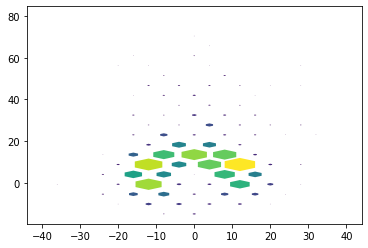

In [20]:
df=team.dataframe[team.offense_slice()]
get_shot_chart(df[(df['Toward Our Goal Distance']>-50)].copy())

In [ ]:
# # Score Keeper fucked up the pull Endzone
# team.dataframe.iloc[1170:1180][['Event Type','Action','Passer','Receiver','Defender','Begin Area', 'Begin X', 'Begin Y', 'End Area', 'End X', 'End Y',
#        'Distance Unit of Measure', 'Absolute Distance', 'Lateral Distance',
#        'Toward Our Goal Distance', ]]

In [20]:
MattSmith = huddlers.Beau('../ultianalyticspull/data/audl/processed/2019/2019_AtlantaHustle.csv', 'Matt Smith')
# MattSmith.dataframe